In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v3', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_cii.update(model_par = {'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'},
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
             dnu = 2.8*u.GHz,
            tobs = 40000*u.h)

Single run:

In [4]:
cii_zdex04 = m_cii.maps

Loading .npz catalogues...


Text(0.5, 1.0, '$Histogram\\ of\\ Intensities$')

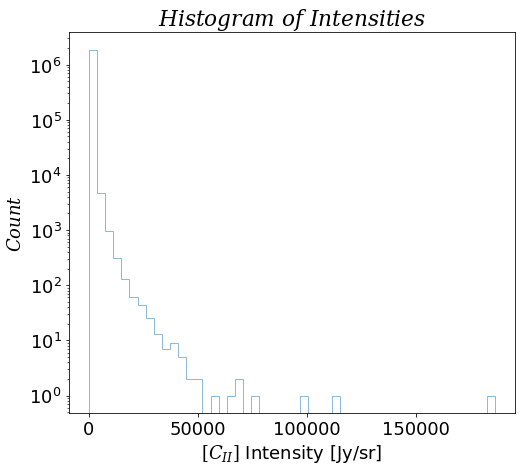

In [40]:
n_zdex04, bins, _ = plt.hist(cii_zdex04.value.flatten(), bins = 50, alpha = 0.5, histtype = 'step')

center = (bins[:-1] + bins[1:]) / 2
    
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

In [7]:
m_cii.update(model_par = {'zdex': 0.2,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'},
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
             dnu = 2.8*u.GHz,
            tobs = 40000*u.h)

In [8]:
cii_zdex02 = m_cii.maps

Loading .npz catalogues...


Text(0.5, 1.0, '$Histogram\\ of\\ Intensities$')

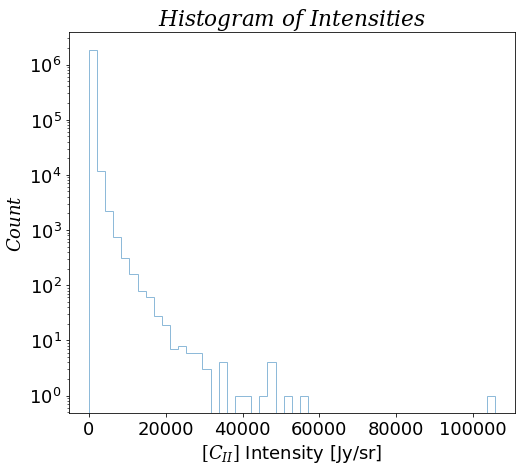

In [41]:
n_zdex02, bins, _ = plt.hist(cii_zdex02.value.flatten(), bins = 50, alpha = 0.5, histtype = 'step')

center = (bins[:-1] + bins[1:]) / 2
    
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

In [10]:
m_cii.update(model_par = {'zdex': 0.6,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'},
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
            dnu = 2.8*u.GHz,
            tobs = 40000*u.h)

In [11]:
cii_zdex06 = m_cii.maps

Loading .npz catalogues...


Text(0.5, 1.0, '$Histogram\\ of\\ Intensities$')

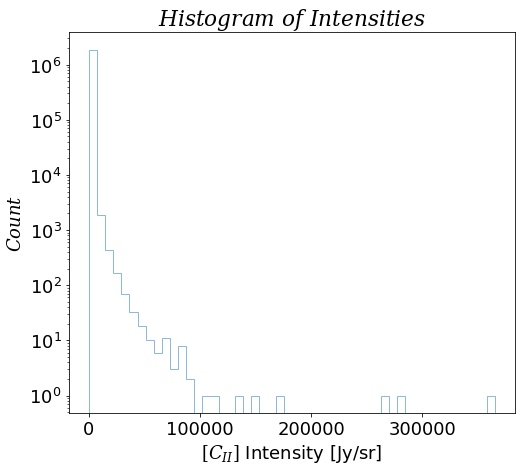

In [42]:
n_zdex06, bins, _ = plt.hist(cii_zdex06.value.flatten(), bins = 50, alpha = 0.5, histtype = 'step')

center = (bins[:-1] + bins[1:]) / 2
    
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

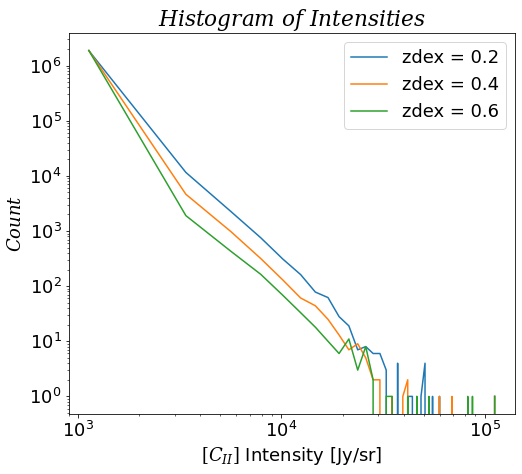

In [53]:
plt.plot(center, n_zdex02, label = 'zdex = 0.2')
plt.plot(center, n_zdex04, label = 'zdex = 0.4')
plt.plot(center, n_zdex06, label = 'zdex = 0.6')

plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.xticks(np.array([0, 100000, 200000, 300000]))
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.xscale('log')
plt.title(r'$Histogram\ of\ Intensities$')

plt.legend()

/tmp/ipykernel_229974/1638296589.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
/tmp/ipykernel_229974/1638296589.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
/tmp/ipykernel_229974/1638296589.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
/tmp/ipykernel_229974/1638296589.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')
/tmp/ipykernel_229974/1638296589.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')
/tmp/ipykernel_229974/1638296589.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')


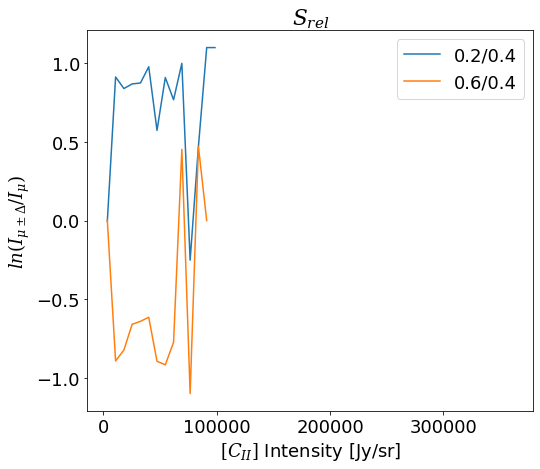

In [44]:
plt.plot(center, np.log(n_zdex02/n_zdex04), label = '0.2/0.4')
plt.plot(center, np.log(n_zdex06/n_zdex04), label = '0.6/0.4')

plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.xticks(np.array([0, 100000, 200000, 300000]))
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
#plt.yscale('log')
plt.title(r'$S_{rel}$')

plt.legend()

Lightcone average:

In [9]:
binning = np.logspace(1, 5, 50)
center = (bins[:-1] + bins[1:]) / 2

In [3]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

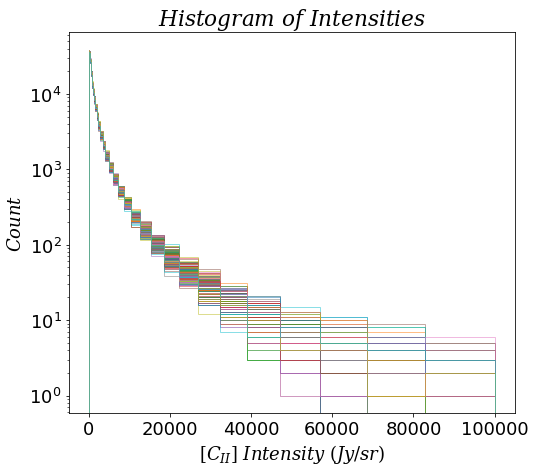

In [4]:
n_zdex04_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    n_zdex04_tot[i], _, _ = plt.hist(sig_nuObs270.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [10]:
avg_zdex04 = np.nanmean(n_zdex04_tot, axis = 0)

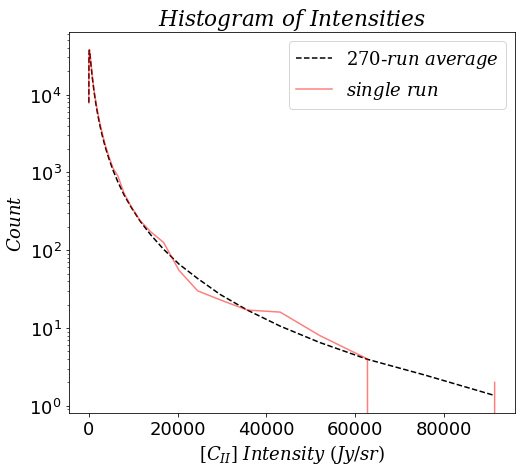

In [7]:
plt.plot(center, avg_zdex04, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex04_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

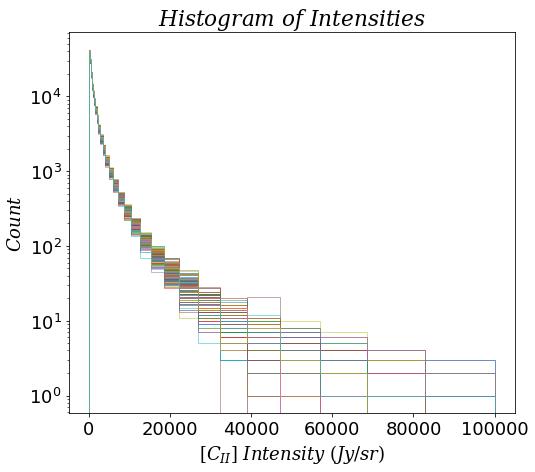

In [11]:
n_zdex03_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')
    n_zdex03_tot[i], _, _ = plt.hist(sig_zdex03.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [12]:
avg_zdex03 = np.nanmean(n_zdex03_tot, axis = 0)

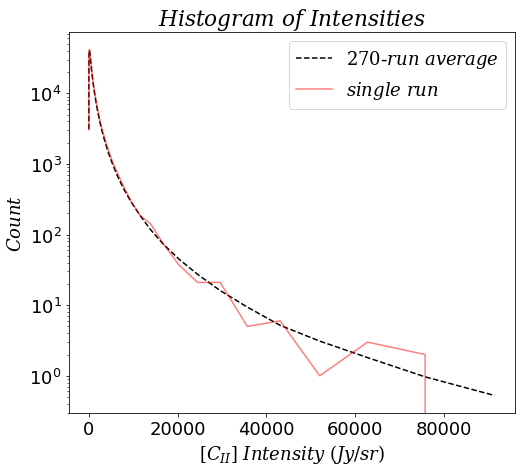

In [61]:
plt.plot(center, avg_zdex03, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex03_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

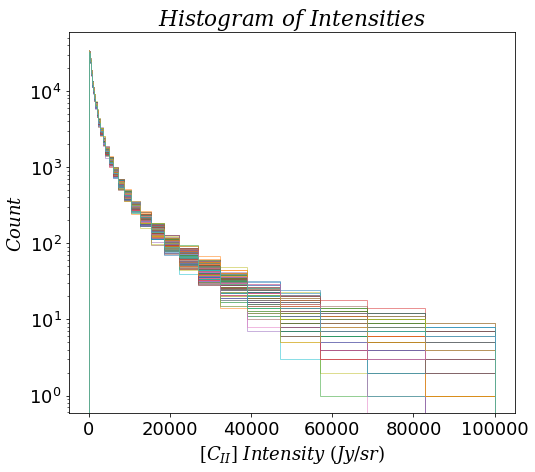

In [13]:
n_zdex05_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')
    n_zdex05_tot[i], _, _ = plt.hist(sig_zdex05.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [14]:
avg_zdex05 = np.nanmean(n_zdex05_tot, axis = 0)

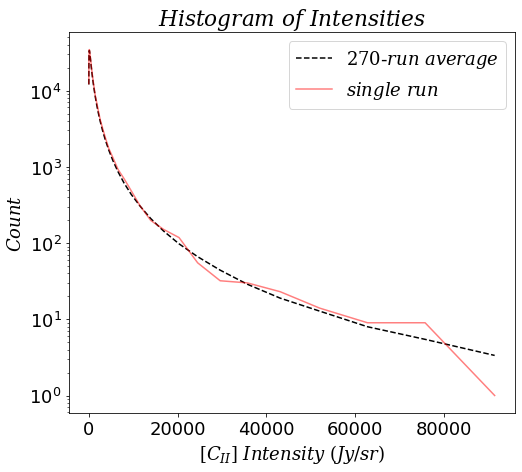

In [64]:
plt.plot(center, avg_zdex05, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex05_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

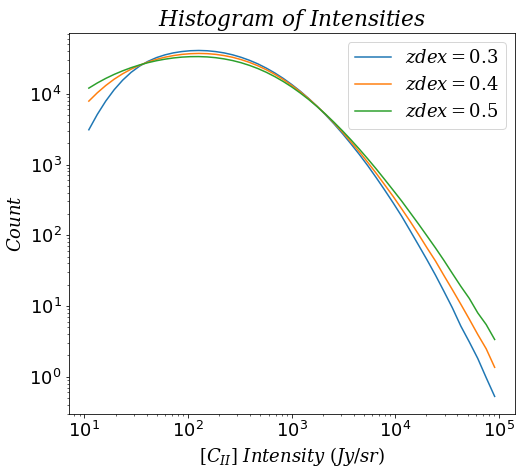

In [15]:
plt.plot(center, avg_zdex03, label = r'$zdex = 0.3$')
plt.plot(center, avg_zdex04, label = r'$zdex = 0.4$')
plt.plot(center, avg_zdex05, label = r'$zdex = 0.5$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/zdex_hist.png', bbox_inches = 'tight')

This makes a lot of sense: as zdex increases, there is more scatter in metallicity. As the scatter in metallicity increases, the scatter in $[C_{II}]$ intensities increases since $L_{[C_{II}]} \propto Z$. As the scatter in $L_{[C_{II}]}$ increases, the distribution of $[C_{II}]$ intensities are more scattered around its average: the intensities before the scattering are pushed up or down with a magnitude proportional to the magnitude of the scatter. As a result, more values are drawn towards the extremes. That means we should expect that as scatter increases,the distribution of intensities flattens towards the center and increases towards the edges, which is what we observe here.

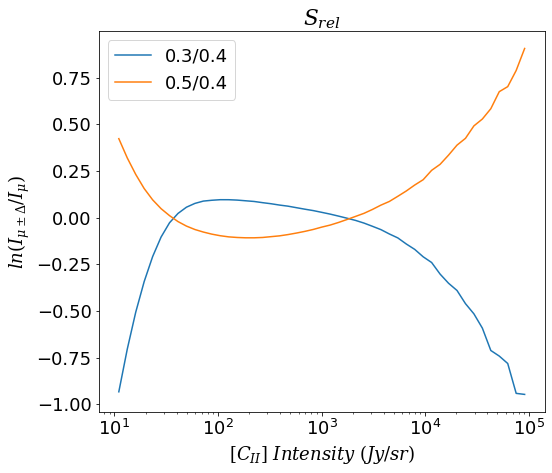

In [16]:
plt.plot(center, np.log(avg_zdex03/avg_zdex04), label = '0.3/0.4')
plt.plot(center, np.log(avg_zdex05/avg_zdex04), label = '0.5/0.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/zdex_srel.png', bbox_inches = 'tight')

$\alpha_{[C_{II}]}$:

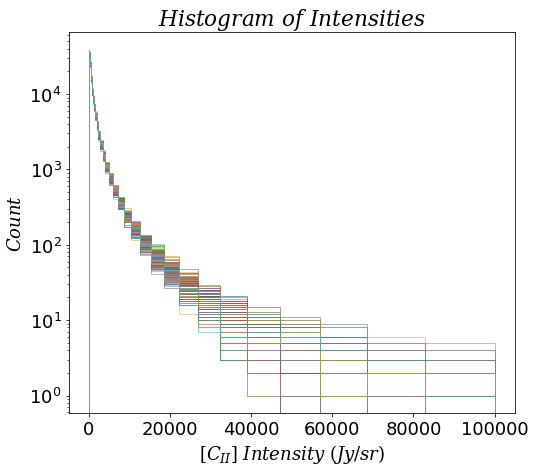

In [17]:
n_a20_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')
    n_a20_tot[i], _, _ = plt.hist(sig_a20.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

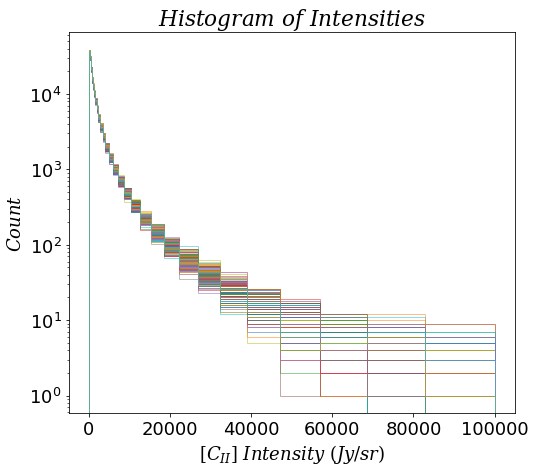

In [18]:
n_a28_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')
    n_a28_tot[i], _, _ = plt.hist(sig_a28.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [19]:
avg_a20 = np.nanmean(n_a20_tot, axis = 0)
avg_a28 = np.nanmean(n_a28_tot, axis = 0)
avg_a24 = avg_zdex04

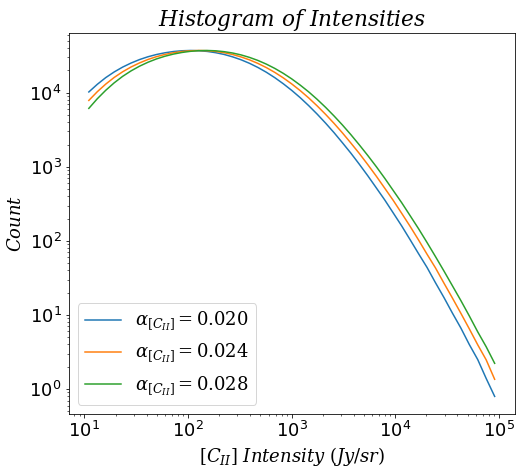

In [20]:
plt.plot(center, avg_a20, label = r'$\alpha_{[C_{II}]} = 0.020$')
plt.plot(center, avg_a24, label = r'$\alpha_{[C_{II}]} = 0.024$')
plt.plot(center, avg_a28, label = r'$\alpha_{[C_{II}]} = 0.028$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

Again, the results here make a lot of sense: $\alpha_{[C_{II}]}$ is the scaling factor of $L_{[C_{II}]}$. If we increase it, we therefore expect the whole distribution of $[C_{II}]$ intensities to increase uniformly. And that is what we observe with the histograms: there are less halos with lower $[C_{II}]$ intensity and more halos with higher $[C_{II}]$ intensity as $\alpha_{[C_{II}]}$ increases.

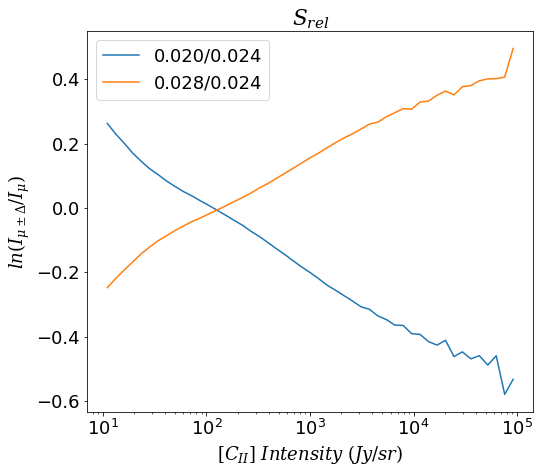

In [21]:
plt.plot(center, np.log(avg_a20/avg_a24), label = '0.020/0.024')
plt.plot(center, np.log(avg_a28/avg_a24), label = '0.028/0.024')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_cii_srel.png', bbox_inches = 'tight')

$\alpha_{M_{HI}}$:

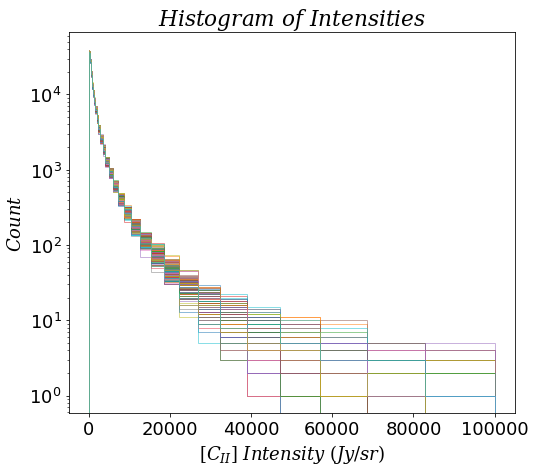

In [22]:
n_mhi68_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')
    n_mhi68_tot[i], _, _ = plt.hist(sig_mhi68.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

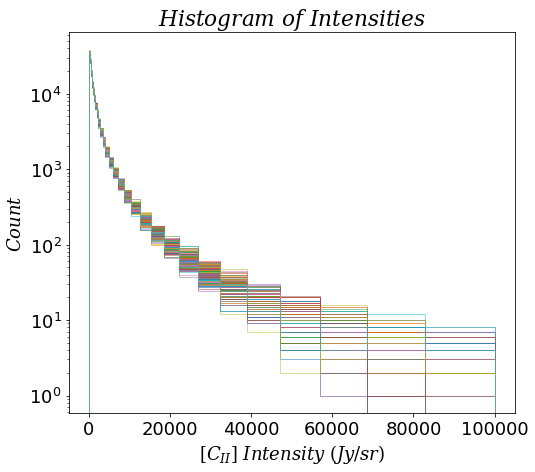

In [23]:
n_mhi80_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')
    n_mhi80_tot[i], _, _ = plt.hist(sig_mhi80.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [24]:
avg_mhi68 = np.nanmean(n_mhi68_tot, axis = 0)
avg_mhi80 = np.nanmean(n_mhi80_tot, axis = 0)
avg_mhi74 = avg_zdex04

(7000, 10000)

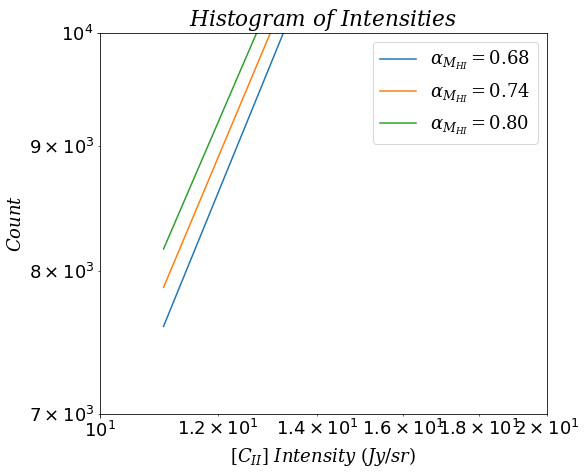

In [25]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.xlim([(10**1), 2*(10**1)])
plt.ylim([7*(10**3), (10**4)])

#plt.savefig('paper_figs/dsrel/alpha_mhi/alpha_mhi_hist_left.png', bbox_inches = 'tight')

(20000, 40000)

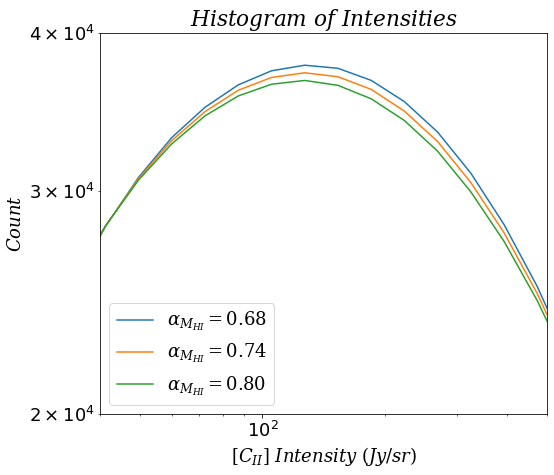

In [26]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.xlim([4*(10**1), 5*(10**2)])
plt.ylim([2*(10**4), 4*(10**4)])

#plt.savefig('paper_figs/dsrel/alpha_mhi/alpha_mhi_hist_top.png', bbox_inches = 'tight')

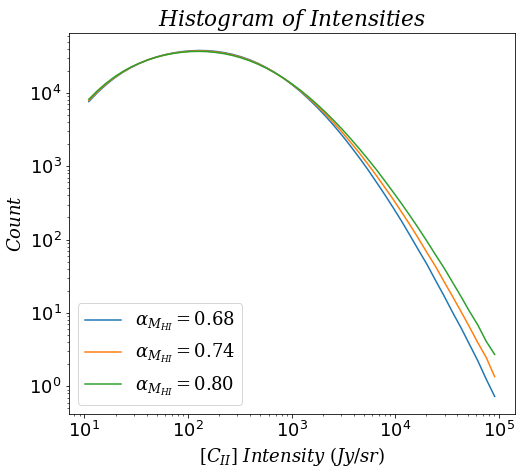

In [27]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

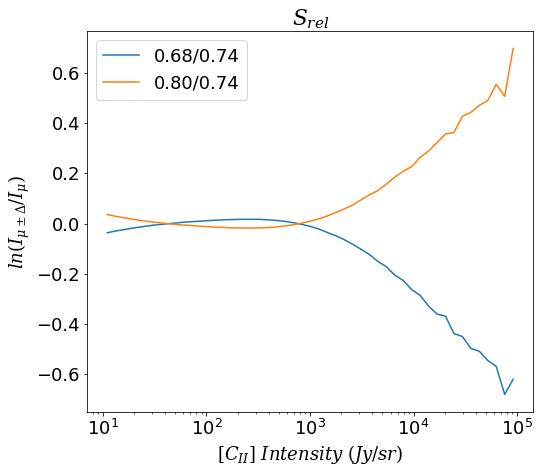

In [28]:
plt.plot(center, np.log(avg_mhi68/avg_mhi74), label = '0.68/0.74')
plt.plot(center, np.log(avg_mhi80/avg_mhi74), label = '0.80/0.74')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mhi_srel.png', bbox_inches = 'tight')

Investigation:

In [28]:
def MH1_fit(M, M_0, M_min, alphaMH1):
    x = M/M_min
    return M_0 * ((x)**alphaMH1) * np.exp(-1/((x)**0.35))

Loading .npz catalogues...


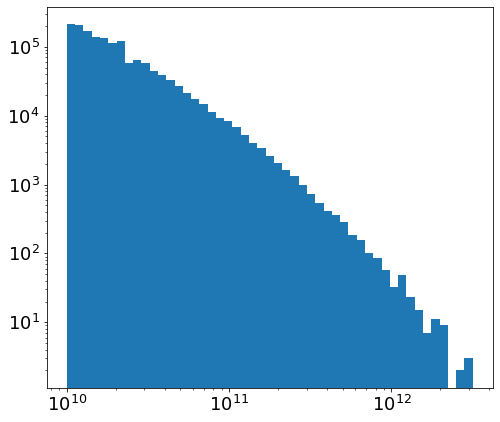

In [29]:
plt.hist(m_cii.halos.M, bins = np.logspace(10, 12.5, 50))
plt.xscale('log')
plt.yscale('log')

In [30]:
m_cii.model_par

{'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [46]:
M_0 = 1900000000.0
M_min = 20000000000
alpha_MHI = 0.74
halos_M = m_cii.halos.M
MHI_sing = MH1_fit(halos_M, M_0, M_min, alpha_MHI)
MHI_sing2 = MH1_fit(halos_M, M_0, M_min, 0.5)
MHI_sing3 = MH1_fit(halos_M, M_0, M_min, 0.6)
MHI_sing4 = MH1_fit(halos_M, M_0, M_min, 0.8)
MHI_sing5 = MH1_fit(halos_M, M_0, M_min, 0.9)

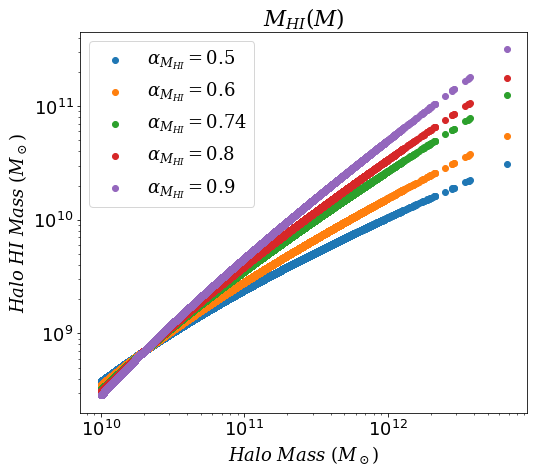

In [62]:
plt.scatter(halos_M, MHI_sing2, label = r'$\alpha_{M_{HI}}=0.5$')
plt.scatter(halos_M, MHI_sing3, label = r'$\alpha_{M_{HI}}=0.6$')
plt.scatter(halos_M, MHI_sing, label = r'$\alpha_{M_{HI}}=0.74$')
plt.scatter(halos_M, MHI_sing4, label = r'$\alpha_{M_{HI}}=0.8$')
plt.scatter(halos_M, MHI_sing5, label = r'$\alpha_{M_{HI}}=0.9$')

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$Halo\ HI\ Mass\ (M_\odot)$')
plt.xlabel(r'$Halo\ Mass\ (M_\odot)$')
plt.title(r'$M_{HI}(M)$')
plt.legend()

plt.savefig('paper_figs/dsrel/alpha_mhi/mhi(m).png')

In [39]:
M_HIs = [0 for i in range(5)]
alpha_MHIs = np.array([0.5, 0.6, 0.74, 0.8, 0.9])
for i in range(5):
    M_HIs[i] = MH1_fit(halos_M, M_0, M_min, alpha_MHIs[i])

In [41]:
import random
rand_halos = random.sample([i for i in range(len(halos_M))], int(0.001*len(halos_M)))
rand_halos = np.array(rand_halos)

In [42]:
halos_M_rand = halos_M[rand_halos]
halos_MHI_rand = [0 for i in range(5)]
for i in range(5):
    halos_MHI_rand[i] = M_HIs[i][rand_halos]

$M_{min}$:

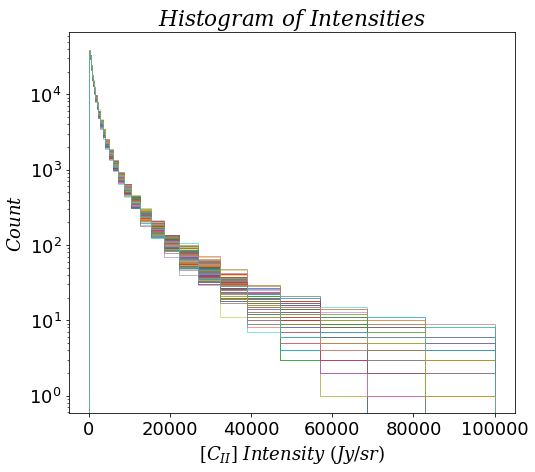

In [29]:
n_min99_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mmin99 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/sig/cii_sig'+str(i)+'.npy')
    n_min99_tot[i], _, _ = plt.hist(sig_mmin99.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

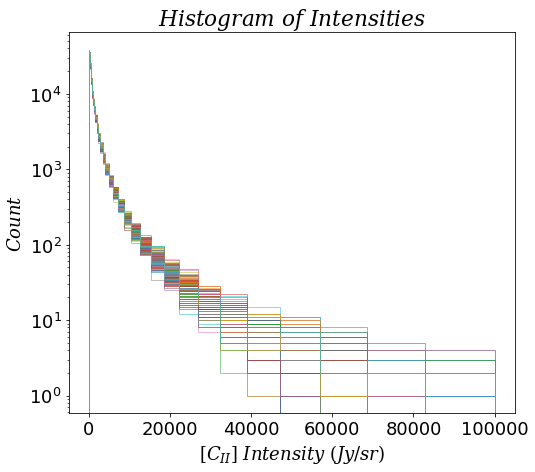

In [30]:
n_min01_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mmin01 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/sig/cii_sig'+str(i)+'.npy')
    n_min01_tot[i], _, _ = plt.hist(sig_mmin01.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [31]:
avg_min99 = np.nanmean(n_min99_tot, axis = 0)
avg_min01 = np.nanmean(n_min01_tot, axis = 0)
avg_min10 = avg_zdex04

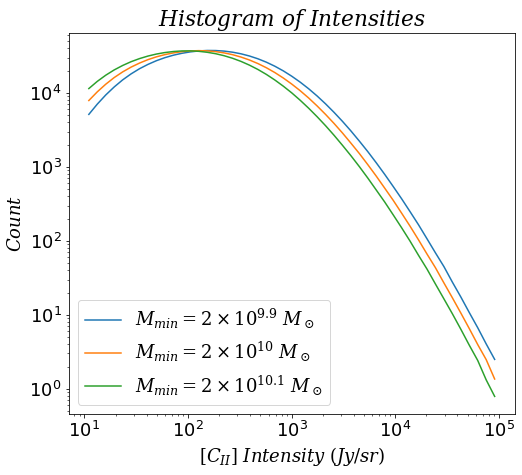

In [32]:
plt.plot(center, avg_min99, label = r'$M_{min} = 2 \times 10^{9.9}\ M_\odot$')
plt.plot(center, avg_min10, label = r'$M_{min} = 2 \times 10^{10}\ M_\odot$')
plt.plot(center, avg_min01, label = r'$M_{min} = 2 \times 10^{10.1}\ M_\odot$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

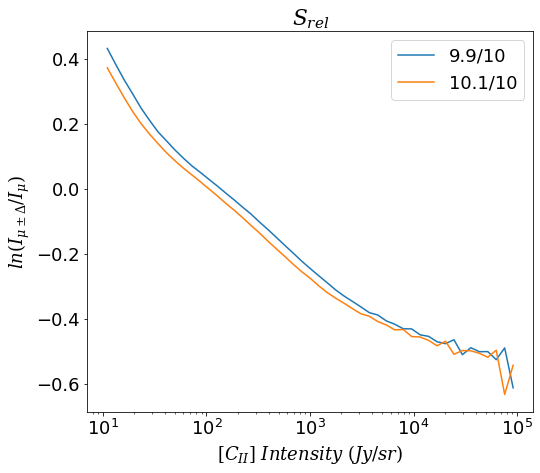

In [33]:
plt.plot(center,-np.log(avg_min99/avg_min10), label = '-9.9/10')
plt.plot(center, np.log(avg_min01/avg_min10), label = '10.1/10')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')

$\alpha_0$:

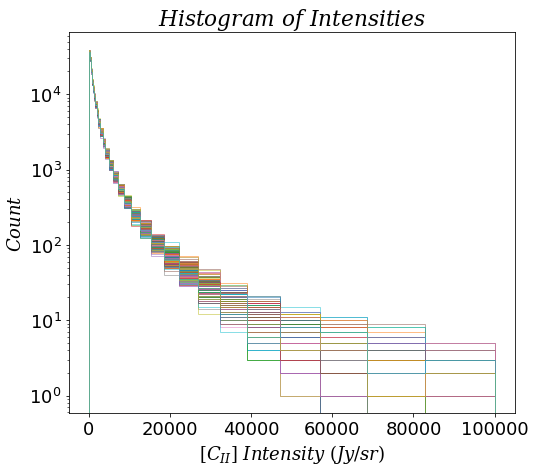

In [34]:
n_a013_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_ao13 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/sig/cii_sig'+str(i)+'.npy')
    n_a013_tot[i], _, _ = plt.hist(sig_ao13.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

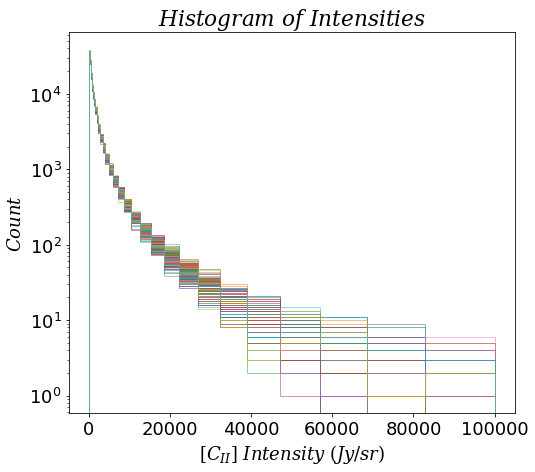

In [35]:
n_a015_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_ao15 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/sig/cii_sig'+str(i)+'.npy')
    n_a015_tot[i], bins, _ = plt.hist(sig_ao15.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [36]:
avg_a013 = np.nanmean(n_a013_tot, axis = 0)
avg_a014 = avg_zdex04
avg_a015 = np.nanmean(n_a015_tot, axis = 0)

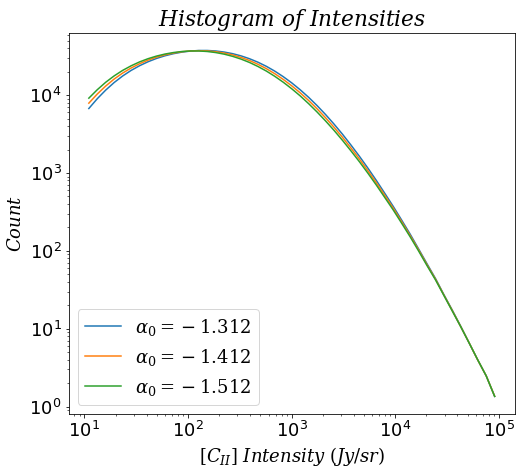

In [37]:
plt.plot(center, avg_a013, label = r'$\alpha_0 = -1.312$')
plt.plot(center, avg_a014, label = r'$\alpha_0 = -1.412$')
plt.plot(center, avg_a015, label = r'$\alpha_0 = -1.512$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

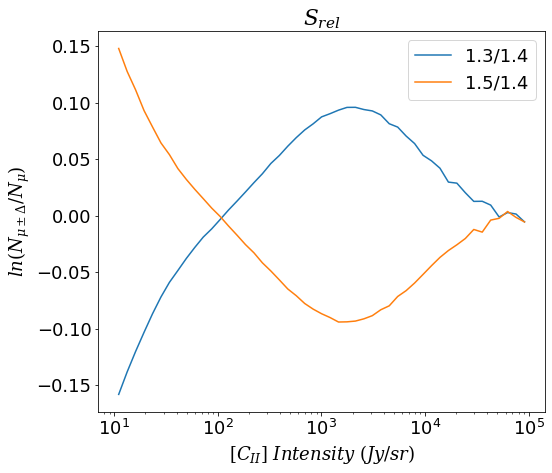

In [38]:
plt.plot(center, np.log(avg_a013/avg_a014), label = '1.3/1.4')
plt.plot(center, np.log(avg_a015/avg_a014), label = '1.5/1.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(N_{\mu \pm \Delta}/N_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')

$\gamma_0$:

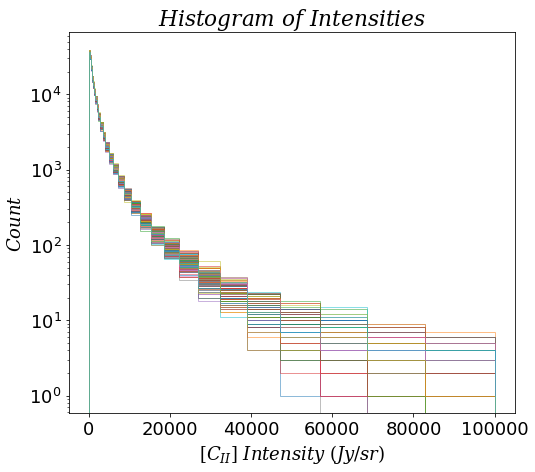

In [39]:
n_g27_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_g27 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/sig/cii_sig'+str(i)+'.npy')
    n_g27_tot[i], _, _ = plt.hist(sig_g27.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

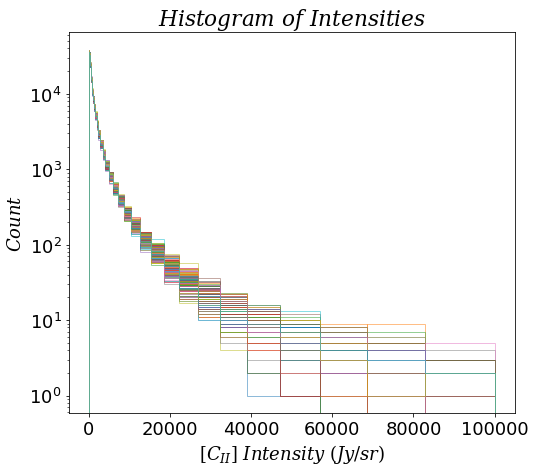

In [40]:
n_g35_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_g35 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/sig/cii_sig'+str(i)+'.npy')
    n_g35_tot[i], bins, _ = plt.hist(sig_g35.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [41]:
avg_g27 = np.nanmean(n_g27_tot, axis = 0)
avg_g31 = avg_zdex04
avg_g35 = np.nanmean(n_g35_tot, axis = 0)

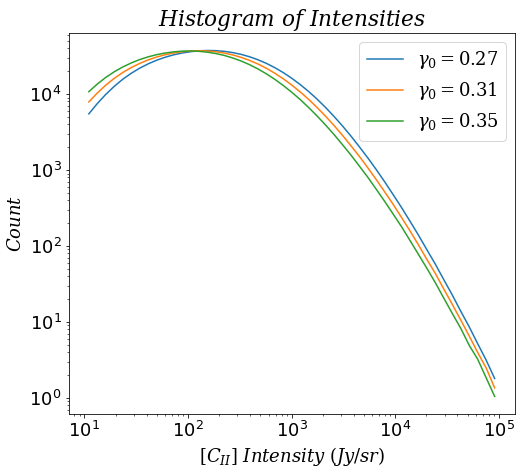

In [42]:
plt.plot(center, avg_g27, label = r'$\gamma_0 = 0.27$')
plt.plot(center, avg_g31, label = r'$\gamma_0 = 0.31$')
plt.plot(center, avg_g35, label = r'$\gamma_0 = 0.35$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

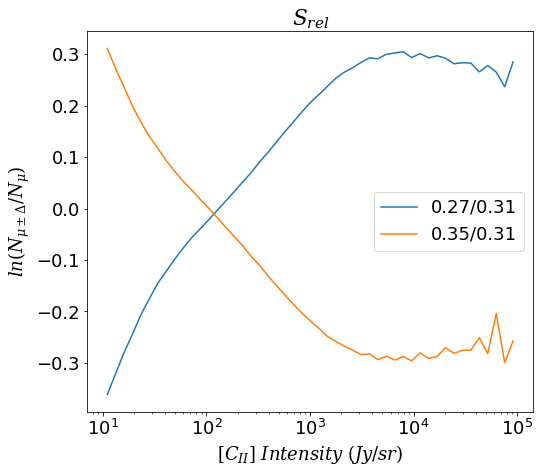

In [43]:
plt.plot(center, np.log(avg_g27/avg_g31), label = '0.27/0.31')
plt.plot(center, np.log(avg_g35/avg_g31), label = '0.35/0.31')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(N_{\mu \pm \Delta}/N_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')

dSrel:

$zdex$: 0.4 $\pm$ 0.1

$\alpha_{[C_{II}]}$ : 0.024 $\pm$ 0.004

$\alpha_{M_{H_I}}$: 0.74 $\pm$ 0.6

$M_{min}$: 2 $\times 10^{10 \pm 0.1} M_\odot$

$\alpha_0$: -1.412 $\pm$ 0.1

$\gamma_0$: 0.31 $\pm$ 0.04

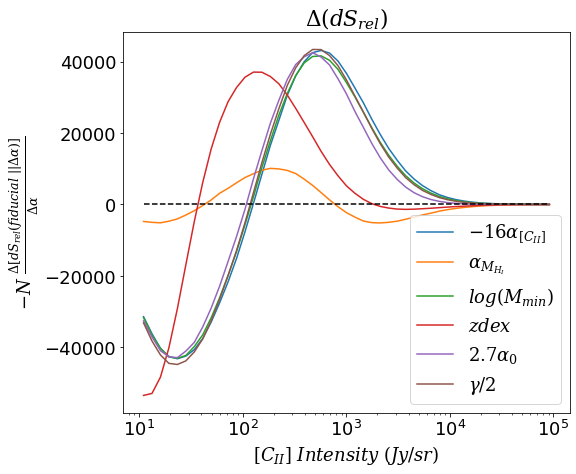

In [44]:
plt.plot(center, avg_a24*(np.log(avg_a28/avg_a24) - np.log(avg_a20/avg_a24))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
plt.plot(center, -avg_mhi74*(np.log(avg_mhi80/avg_mhi74) - np.log(avg_mhi68/avg_mhi74))/0.12, label = r'$\alpha_{M_{H_I}}$')
plt.plot(center, -avg_min10*(np.log(avg_min01/avg_min10) - np.log(avg_min99/avg_min10))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(center, -avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2, label = r'$zdex$')
plt.plot(center, -2.7*avg_a014*(np.log(avg_a015/avg_a014) - np.log(avg_a013/avg_a014))/0.2, label = r'$2.7\alpha_0$')
plt.plot(center, -0.5*avg_g31*(np.log(avg_g35/avg_g31) - np.log(avg_g27/avg_g31))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = center[0], xmax = center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

In [45]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_basis.npy', avg_zdex04)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_zdex0-3.npy', avg_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_zdex0-5.npy', avg_zdex05)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_acii0-020.npy', avg_a20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_acii0-028.npy', avg_a28)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_mhi0-68.npy', avg_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_mhi0-80.npy', avg_mhi80)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_logmmin9-9.npy', avg_min99)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_logmmin10-1.npy', avg_min01)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_a0_-1-312.npy', avg_a013)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_a0_-1-512.npy', avg_a015)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_g0_0-27.npy', avg_g27)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_g0_0-35.npy', avg_g35)

Forecasts:

$zdex$:

In [46]:
lin_binning = np.linspace(-4*10**(4), 4*10**(4), 80)
lin_center = (lin_binning[:-1] + lin_binning[1:]) / 2

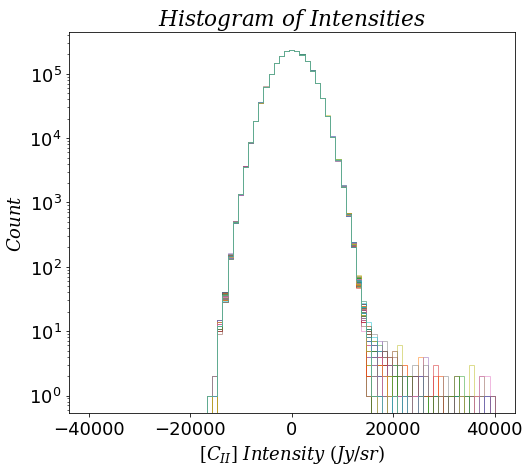

In [48]:
n_zdex04_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/for/cii_for'+str(i)+'.npy')
    n_zdex04_tot_for[i], _, _ = plt.hist(for_nuObs270.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

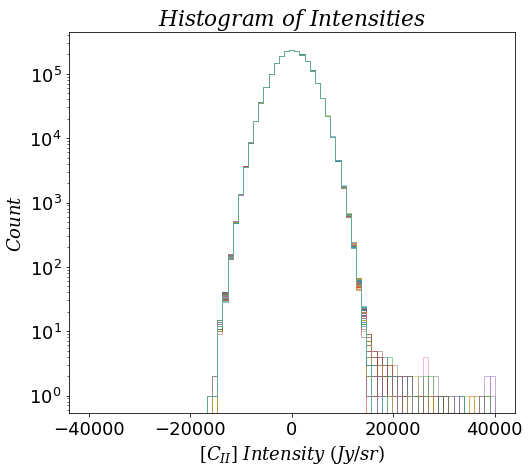

In [49]:
n_zdex03_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/for/cii_for'+str(i)+'.npy')
    n_zdex03_tot_for[i], _, _ = plt.hist(for_zdex03.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

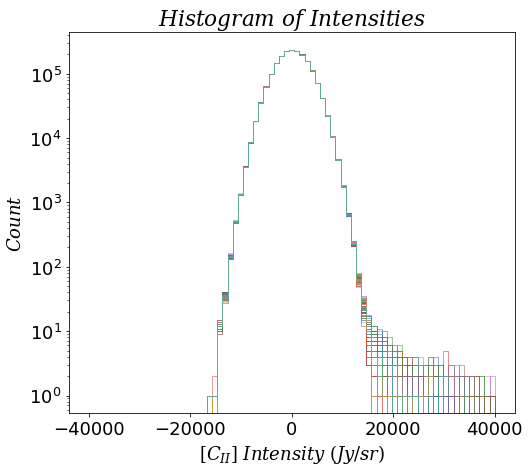

In [50]:
n_zdex05_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/for/cii_for'+str(i)+'.npy')
    n_zdex05_tot_for[i], _, _ = plt.hist(for_zdex05.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [51]:
avg_zdex03_for = np.nanmean(n_zdex03_tot_for, axis = 0)
avg_zdex04_for = np.nanmean(n_zdex04_tot_for, axis = 0)
avg_zdex05_for = np.nanmean(n_zdex05_tot_for, axis = 0)

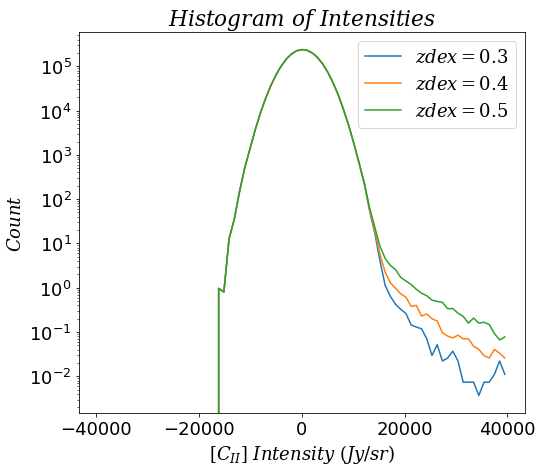

In [58]:
plt.plot(lin_center, avg_zdex03_for, label = r'$zdex = 0.3$')
plt.plot(lin_center, avg_zdex04_for, label = r'$zdex = 0.4$')
plt.plot(lin_center, avg_zdex05_for, label = r'$zdex = 0.5$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

In [142]:
noise_map = np.random.normal(0, m_cii.sigma_N.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii.nuObs)).value, np.shape(sig_zdex05))

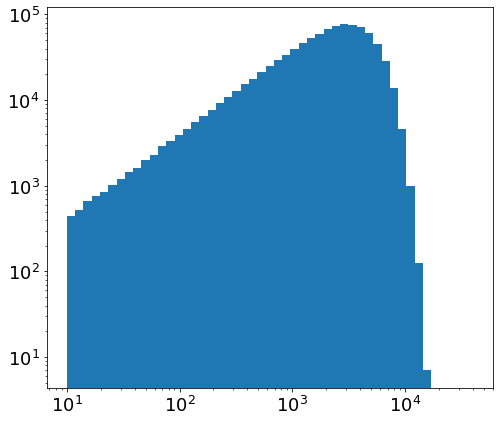

In [148]:
plt.hist(noise_map.flatten(), bins = binning)
plt.xscale('log')
plt.yscale('log')

/tmp/ipykernel_1485185/1853769590.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_zdex03_for/avg_zdex04_for), label = '0.3/0.4')
/tmp/ipykernel_1485185/1853769590.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_zdex05_for/avg_zdex04_for), label = '0.5/0.4')


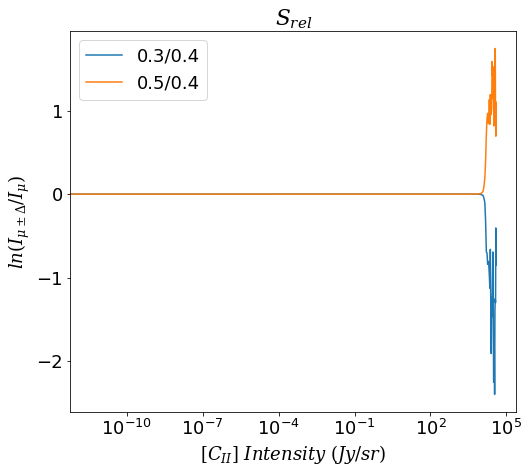

In [60]:
plt.plot(lin_center, np.log(avg_zdex03_for/avg_zdex04_for), label = '0.3/0.4')
plt.plot(lin_center, np.log(avg_zdex05_for/avg_zdex04_for), label = '0.5/0.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()

In [105]:
#avg_basis = avg_zdex04_for

$\alpha_{[C_{II}]}$:

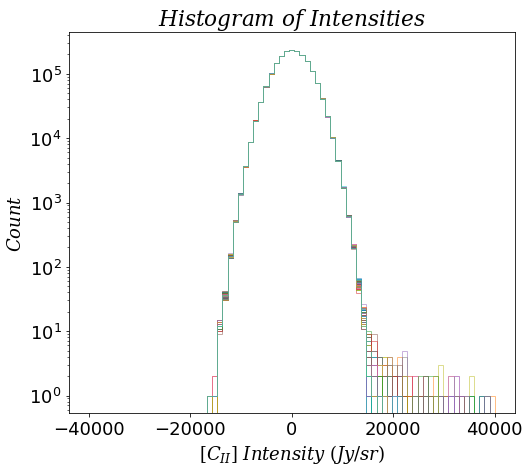

In [61]:
n_a20_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/for/cii_for'+str(i)+'.npy')
    n_a20_tot_for[i], _, _ = plt.hist(for_a20.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

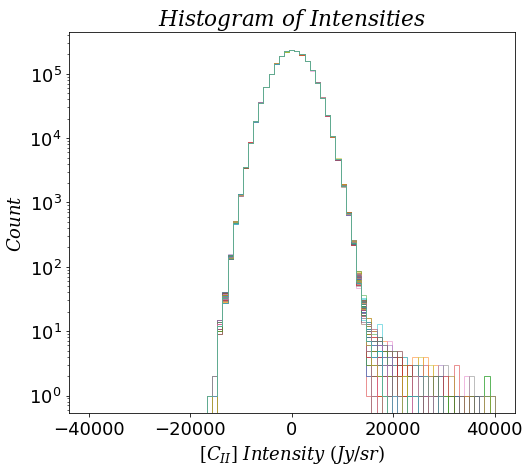

In [62]:
n_a28_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/for/cii_for'+str(i)+'.npy')
    n_a28_tot_for[i], _, _ = plt.hist(for_a28.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [63]:
avg_a20_for = np.nanmean(n_a20_tot_for, axis = 0)
avg_a24_for = avg_zdex04_for
avg_a28_for = np.nanmean(n_a28_tot_for, axis = 0)

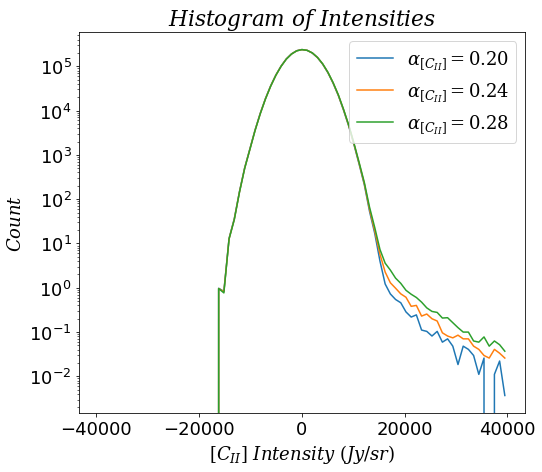

In [64]:
plt.plot(lin_center, avg_a20_for, label = r'$\alpha_{[C_{II}]} = 0.20$')
plt.plot(lin_center, avg_a24_for, label = r'$\alpha_{[C_{II}]} = 0.24$')
plt.plot(lin_center, avg_a28_for, label = r'$\alpha_{[C_{II}]} = 0.28$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

/tmp/ipykernel_1485185/1316502898.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_a20_for/avg_a24_for), label = '0.20/0.24')
/tmp/ipykernel_1485185/1316502898.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, np.log(avg_a20_for/avg_a24_for), label = '0.20/0.24')
/tmp/ipykernel_1485185/1316502898.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_a28_for/avg_a24_for), label = '0.28/0.24')


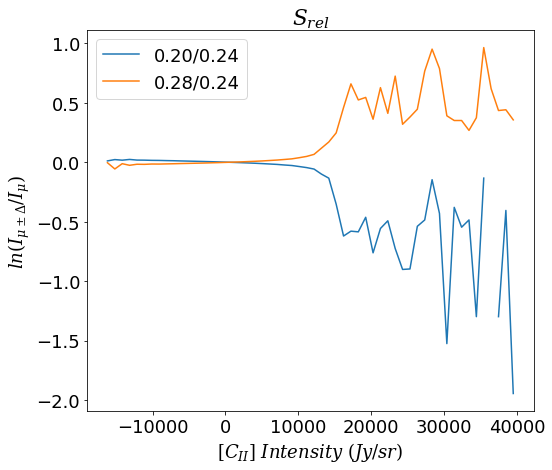

In [65]:
plt.plot(lin_center, np.log(avg_a20_for/avg_a24_for), label = '0.20/0.24')
plt.plot(lin_center, np.log(avg_a28_for/avg_a24_for), label = '0.28/0.24')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
#plt.xscale('log')

plt.legend()

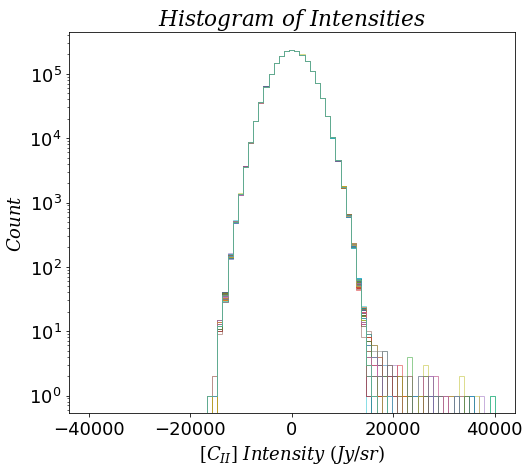

In [66]:
n_mhi68_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/for/cii_for'+str(i)+'.npy')
    n_mhi68_tot_for[i], _, _ = plt.hist(for_mhi68.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

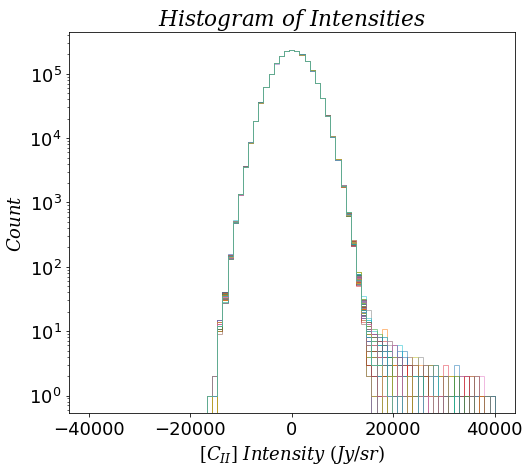

In [67]:
n_mhi80_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/for/cii_for'+str(i)+'.npy')
    n_mhi80_tot_for[i], _, _ = plt.hist(for_mhi80.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [68]:
avg_mhi68_for = np.nanmean(n_mhi68_tot_for, axis = 0)
avg_mhi74_for = avg_zdex04_for
avg_mhi80_for = np.nanmean(n_mhi80_tot_for, axis = 0)

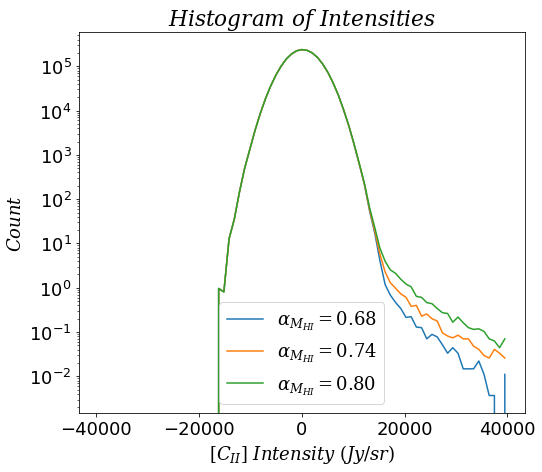

In [69]:
plt.plot(lin_center, avg_mhi68_for, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(lin_center, avg_mhi74_for, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(lin_center, avg_mhi80_for, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

/tmp/ipykernel_1485185/3241658187.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_mhi68_for/avg_mhi74_for), label = '0.68/0.74')
/tmp/ipykernel_1485185/3241658187.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, np.log(avg_mhi68_for/avg_mhi74_for), label = '0.68/0.74')
/tmp/ipykernel_1485185/3241658187.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_mhi80_for/avg_mhi74_for), label = '0.80/0.74')


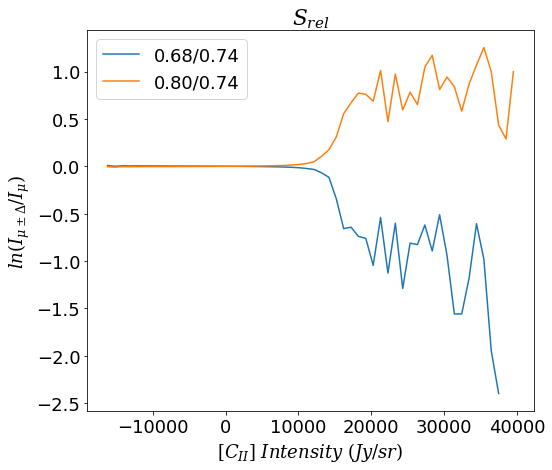

In [70]:
plt.plot(lin_center, np.log(avg_mhi68_for/avg_mhi74_for), label = '0.68/0.74')
plt.plot(lin_center, np.log(avg_mhi80_for/avg_mhi74_for), label = '0.80/0.74')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
#plt.xscale('log')

plt.legend()

$M_{min}$:

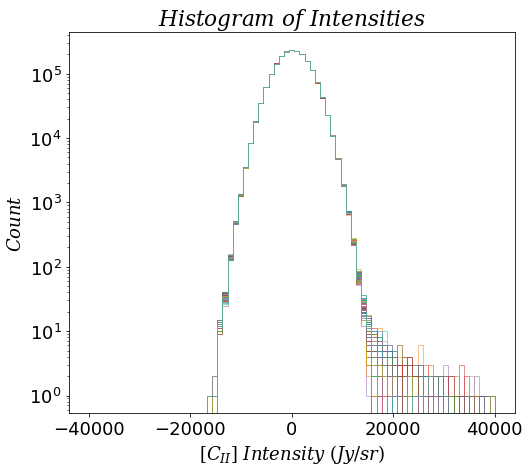

In [71]:
n_min99_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mmin99 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/for/cii_for'+str(i)+'.npy')
    n_min99_tot_for[i], _, _ = plt.hist(for_mmin99.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

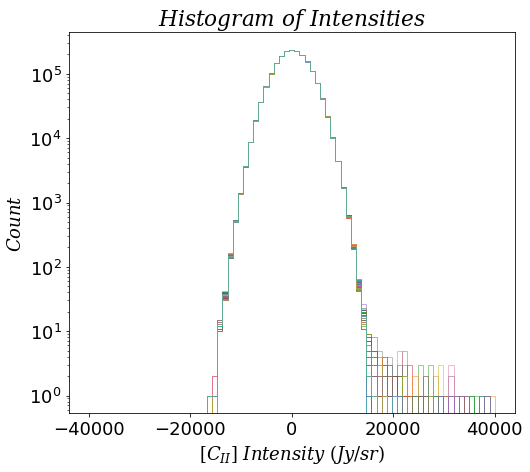

In [72]:
n_min01_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mmin01 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/for/cii_for'+str(i)+'.npy')
    n_min01_tot_for[i], _, _ = plt.hist(for_mmin01.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [73]:
avg_min99_for = np.nanmean(n_min99_tot_for, axis = 0)
avg_min10_for = avg_zdex04_for
avg_min01_for = np.nanmean(n_min01_tot_for, axis = 0)

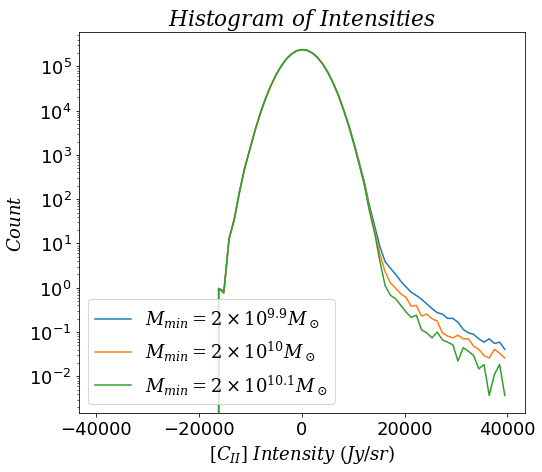

In [74]:
plt.plot(lin_center, avg_min99_for, label = r'$M_{min} = 2 \times 10^{9.9} M_\odot$')
plt.plot(lin_center, avg_min10_for, label = r'$M_{min} = 2 \times 10^{10} M_\odot$')
plt.plot(lin_center, avg_min01_for, label = r'$M_{min} = 2 \times 10^{10.1} M_\odot$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

/tmp/ipykernel_1485185/1460851551.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_min99_for/avg_min10_for), label = '9.9/10')
/tmp/ipykernel_1485185/1460851551.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_min01_for/avg_min10_for), label = '10.1/10')


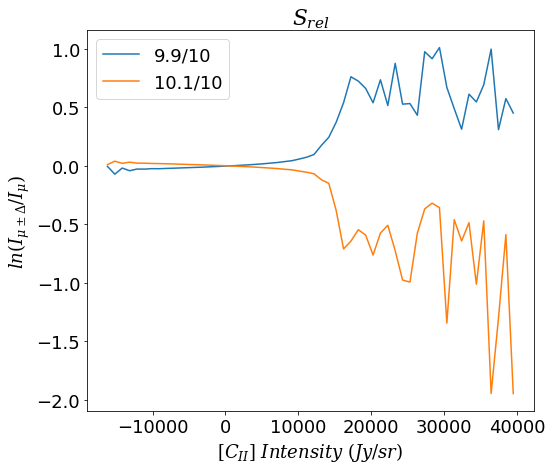

In [75]:
plt.plot(lin_center, np.log(avg_min99_for/avg_min10_for), label = '9.9/10')
plt.plot(lin_center, np.log(avg_min01_for/avg_min10_for), label = '10.1/10')


# $[\rm{C\ \scriptsize II}]$
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
#plt.xlabel(r"$[{C\ \scriptsize{II}}]\ Intensity\ (Jy/sr)$")
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
#plt.xscale('log')

plt.legend()

$\alpha_0$:

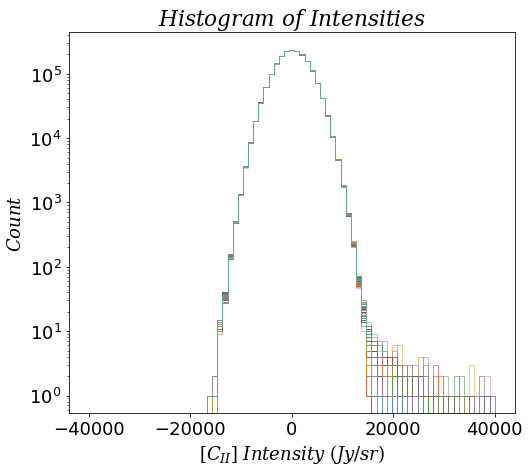

In [78]:
n_a013_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_ao13 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/for/cii_for'+str(i)+'.npy')
    n_a013_tot_for[i], _, _ = plt.hist(for_ao13.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

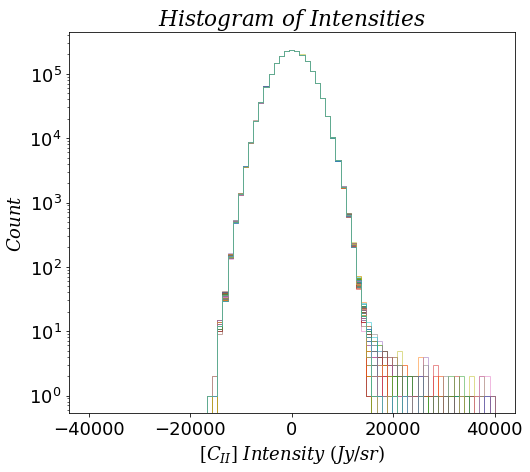

In [77]:
n_a015_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_ao15 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/for/cii_for'+str(i)+'.npy')
    n_a015_tot_for[i], _, _ = plt.hist(for_ao15.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [79]:
avg_a013_for = np.nanmean(n_a013_tot_for, axis = 0)
avg_a014_for = avg_zdex04_for
avg_a015_for = np.nanmean(n_a015_tot_for, axis = 0)

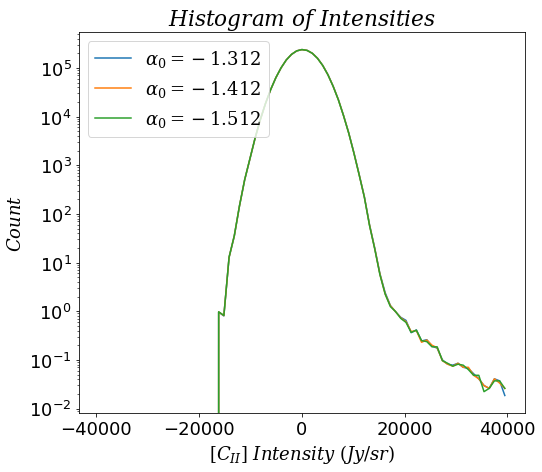

In [80]:
plt.plot(lin_center, avg_a013_for, label = r'$\alpha_{0} = -1.312$')
plt.plot(lin_center, avg_a014_for, label = r'$\alpha_{0} = -1.412$')
plt.plot(lin_center, avg_a015_for, label = r'$\alpha_{0} = -1.512$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

/tmp/ipykernel_1485185/825855315.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_a013_for/avg_a014_for), label = '1.3/1.4')
/tmp/ipykernel_1485185/825855315.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_a015_for/avg_a014_for), label = '1.5/1.4')


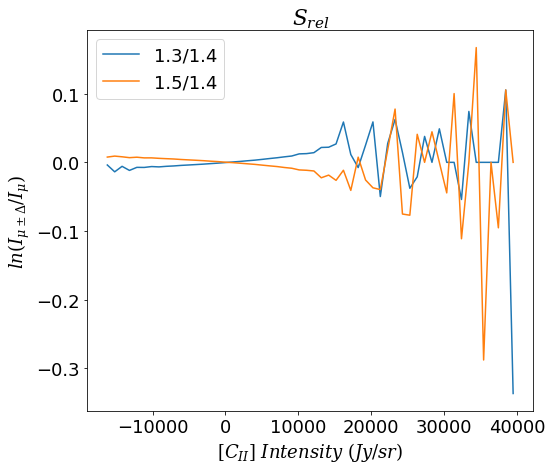

In [81]:
plt.plot(lin_center, np.log(avg_a013_for/avg_a014_for), label = '1.3/1.4')
plt.plot(lin_center, np.log(avg_a015_for/avg_a014_for), label = '1.5/1.4')


# $[\rm{C\ \scriptsize II}]$
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
#plt.xlabel(r"$[{C\ \scriptsize{II}}]\ Intensity\ (Jy/sr)$")
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
#plt.xscale('log')

plt.legend()

$\gamma_0$:

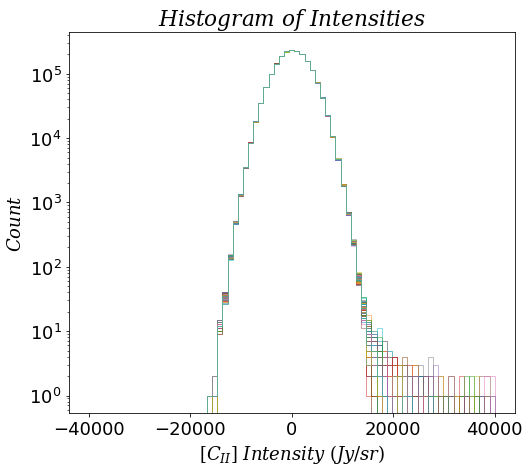

In [82]:
n_g27_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_g27 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/for/cii_for'+str(i)+'.npy')
    n_g27_tot_for[i], _, _ = plt.hist(for_g27.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

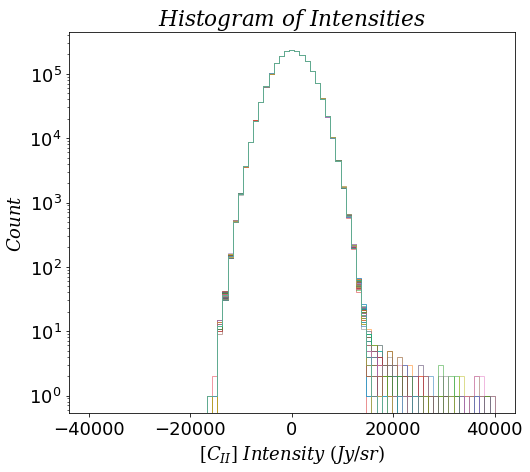

In [83]:
n_g35_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_g35 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/for/cii_for'+str(i)+'.npy')
    n_g35_tot_for[i], _, _ = plt.hist(for_g35.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [84]:
avg_g27_for = np.nanmean(n_g27_tot_for, axis = 0)
avg_g31_for = avg_zdex04_for
avg_g35_for = np.nanmean(n_g35_tot_for, axis = 0)

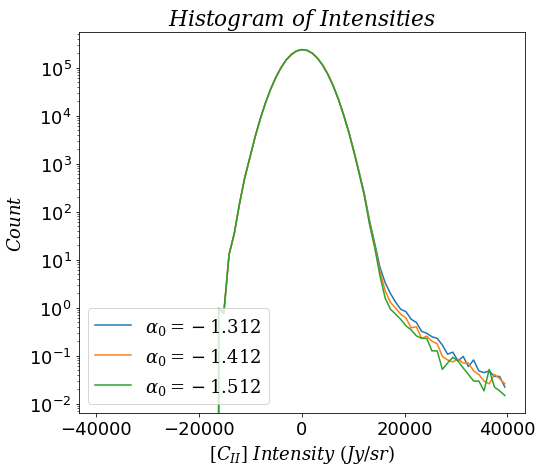

In [85]:
plt.plot(lin_center, avg_g27_for, label = r'$\alpha_{0} = -1.312$')
plt.plot(lin_center, avg_g31_for, label = r'$\alpha_{0} = -1.412$')
plt.plot(lin_center, avg_g35_for, label = r'$\alpha_{0} = -1.512$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

/tmp/ipykernel_1485185/54604648.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_g27_for/avg_g31_for), label = '0.27/0.31')
/tmp/ipykernel_1485185/54604648.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, np.log(avg_g35_for/avg_g31_for), label = '0.35/0.31')


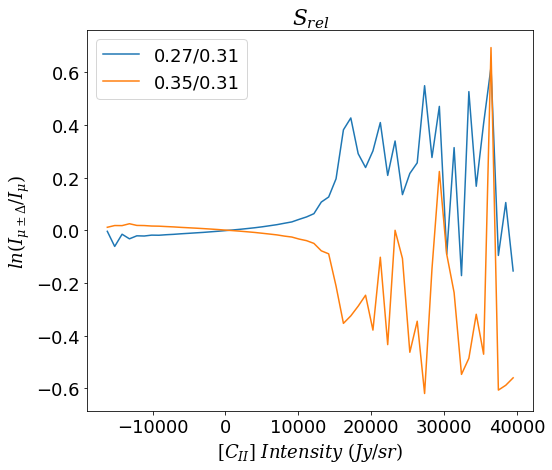

In [86]:
plt.plot(lin_center, np.log(avg_g27_for/avg_g31_for), label = '0.27/0.31')
plt.plot(lin_center, np.log(avg_g35_for/avg_g31_for), label = '0.35/0.31')


# $[\rm{C\ \scriptsize II}]$
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
#plt.xlabel(r"$[{C\ \scriptsize{II}}]\ Intensity\ (Jy/sr)$")
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
#plt.xscale('log')

plt.legend()

/tmp/ipykernel_1485185/4025620856.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
/tmp/ipykernel_1485185/4025620856.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
/tmp/ipykernel_1485185/4025620856.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, -avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$\alpha_{M_{H_I}}$')
/tmp/ipykernel_1485185/4025620856.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, -avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$\alpha_{M_{H_I}}$')
/tmp/ipykernel_1485185/4025620856.

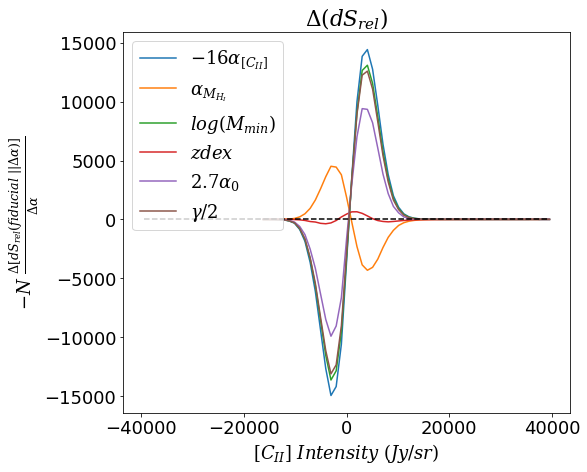

In [88]:
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
plt.plot(lin_center, -avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$\alpha_{M_{H_I}}$')
plt.plot(lin_center, -avg_min10_for*(np.log(avg_min01_for/avg_min10_for) - np.log(avg_min99_for/avg_min10_for))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(lin_center, -avg_zdex04_for*(np.log(avg_zdex05_for/avg_zdex04_for) - np.log(avg_zdex03_for/avg_zdex04_for))/0.2, label = r'$zdex$')
plt.plot(lin_center, -2.7*avg_a014_for*(np.log(avg_a015_for/avg_a014_for) - np.log(avg_a013_for/avg_a014_for))/0.2, label = r'$2.7\alpha_0$')
plt.plot(lin_center, -0.5*avg_g31_for*(np.log(avg_g35_for/avg_g31_for) - np.log(avg_g27_for/avg_g31_for))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
#plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = lin_center[0], xmax = lin_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

/tmp/ipykernel_1485185/1485768498.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
/tmp/ipykernel_1485185/1485768498.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
/tmp/ipykernel_1485185/1485768498.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$-3\alpha_{M_{H_I}}$')
/tmp/ipykernel_1485185/1485768498.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$-3\alpha_{M_{H_I}}$')
/tmp/ipykernel_1485185/148

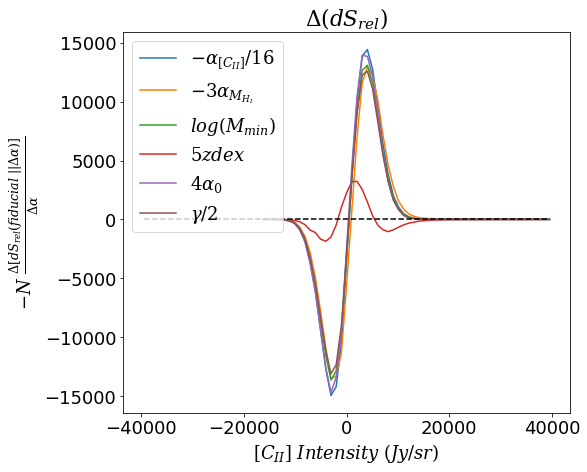

In [102]:
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$-3\alpha_{M_{H_I}}$')
plt.plot(lin_center, -avg_min10_for*(np.log(avg_min01_for/avg_min10_for) - np.log(avg_min99_for/avg_min10_for))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(lin_center, -5*avg_zdex04_for*(np.log(avg_zdex05_for/avg_zdex04_for) - np.log(avg_zdex03_for/avg_zdex04_for))/0.2, label = r'$5zdex$')
plt.plot(lin_center, -4*avg_a014_for*(np.log(avg_a015_for/avg_a014_for) - np.log(avg_a013_for/avg_a014_for))/0.2, label = r'$4\alpha_0$')
plt.plot(lin_center, -0.5*avg_g31_for*(np.log(avg_g35_for/avg_g31_for) - np.log(avg_g27_for/avg_g31_for))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
#plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = lin_center[0], xmax = lin_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

In [103]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_basis.npy', avg_zdex04_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_zdex0-3.npy', avg_zdex03_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_zdex0-5.npy', avg_zdex05_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_acii0-020.npy', avg_a20_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_acii0-028.npy', avg_a28_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_mhi0-68.npy', avg_mhi68_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_mhi0-80.npy', avg_mhi80_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_logmmin9-9.npy', avg_min99_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_logmmin10-1.npy', avg_min01_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_a0_-1-312.npy', avg_a013_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_a0_-1-512.npy', avg_a015_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_g0_0-27.npy', avg_g27_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_g0_0-35.npy', avg_g35_for)